In [30]:

players <- read.csv("players.csv")
sessions <- read.csv("sessions.csv")



ERROR: This version of R is not set up to install source packages
If it was installed from an RPM, you may need the R-devel RPM

In [21]:
## Data Description Players
## 
## Players Number of Observations: 196
##
summary(players)
##
## Number of Variables: 7
## experience -> character -> their level of experience in the game
## subscribe -> logical -> if they are subscribed, true if they are
## hashedEmail -> character -> their associated email
## played_hours -> double -> amount of hours that they played
## name -> character -> what their name is
## gender -> character -> what gender the player is
## age -> integer -> how old the player is
##
## potential problems: experience could be fairly arbitrary as its fairly subjective. As well as players having 0 played hours affecting the data

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [24]:
## Data Description Sessions
##
summary(sessions)
##
## Number of Observations: 1535
##
## Number of variables: 5
##
## hashedEmail -> character -> assosciated email with the player
## start_time -> character -> the start time of the session
## end_time -> character -> the end time of the session
## originial_start_time -> double -> start time, exact milisecond
## originial_end_time -> double -> start time, exact milisecond
## Potential Problems: Confusing on how to original_time is listed, will have to mutate it to make it more readable
##


 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

In [ ]:
## Question
##
## Can Experience predict play-time.
##
## Response Variable of interest: average playtime (would have to make a new variable using original_start_time and original_end_time)
## Main Explanatory Variable: experience
##
## I plan to wrangle a average_playtime variable together and use experience to see if it can predict the amount of playtime somebody will have. Then using a KNN formula it could potentiall
## categorize a players experience based off of playtime. This can then to be used to answer who to send newsletters to.
## 


In [7]:

##  Exploratory Data Analysis and Visualization
##
players <- read.csv("players.csv")
sessions <- read.csv("sessions.csv")

str(players)
str(sessions)

head(players)

played_hours_mean <- mean(players$played_hours, na.rm = TRUE)

original_start_time_mean <- mean(sessions$original_start_time, na.rm = TRUE)
original_end_time_mean   <- mean(sessions$original_end_time, na.rm = TRUE)



'data.frame':	196 obs. of  7 variables:
 $ experience  : chr  "Pro" "Veteran" "Veteran" "Amateur" ...
 $ subscribe   : logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ hashedEmail : chr  "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d" "f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9" "b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28" "23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5" ...
 $ played_hours: num  30.3 3.8 0 0.7 0.1 0 0 0 0.1 0 ...
 $ name        : chr  "Morgan" "Christian" "Blake" "Flora" ...
 $ gender      : chr  "Male" "Male" "Male" "Female" ...
 $ Age         : int  9 17 17 21 21 17 19 21 47 22 ...
'data.frame':	1535 obs. of  5 variables:
 $ hashedEmail        : chr  "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf" "36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686" "f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc" "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f

[1] 1.719196e+12

In [8]:
played_hours_mean

[1] 5.845918

In [9]:
original_start_time_mean

[1] 1.719201e+12

In [10]:
original_end_time_mean

[1] 1.719196e+12

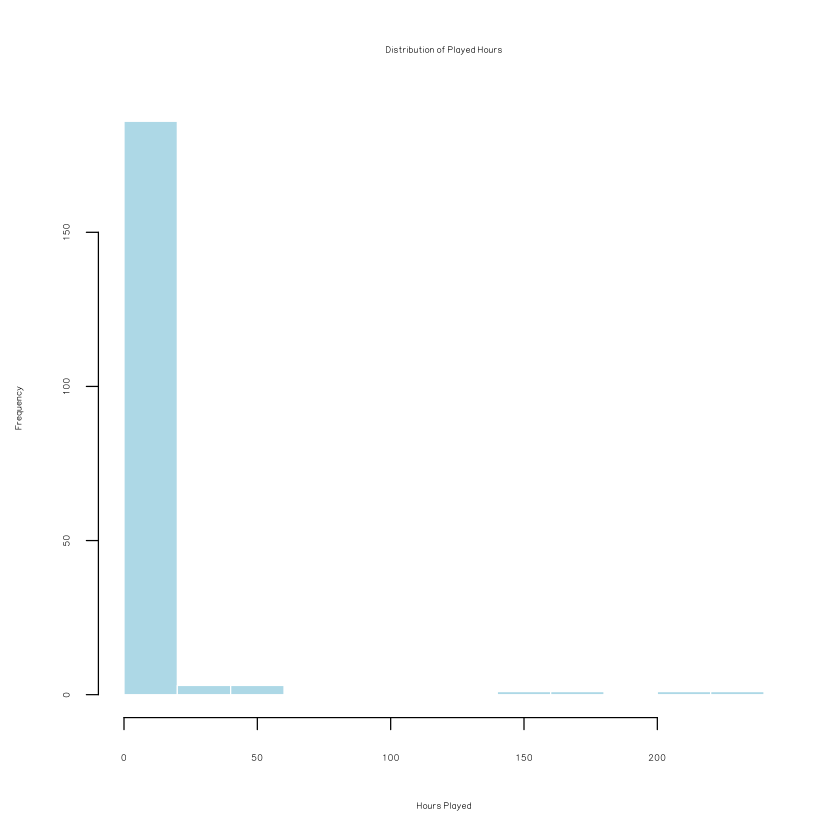

In [11]:
hist(players$played_hours,
     main = "Distribution of Played Hours",
     xlab = "Hours Played",
     col = "lightblue",
     border = "white")


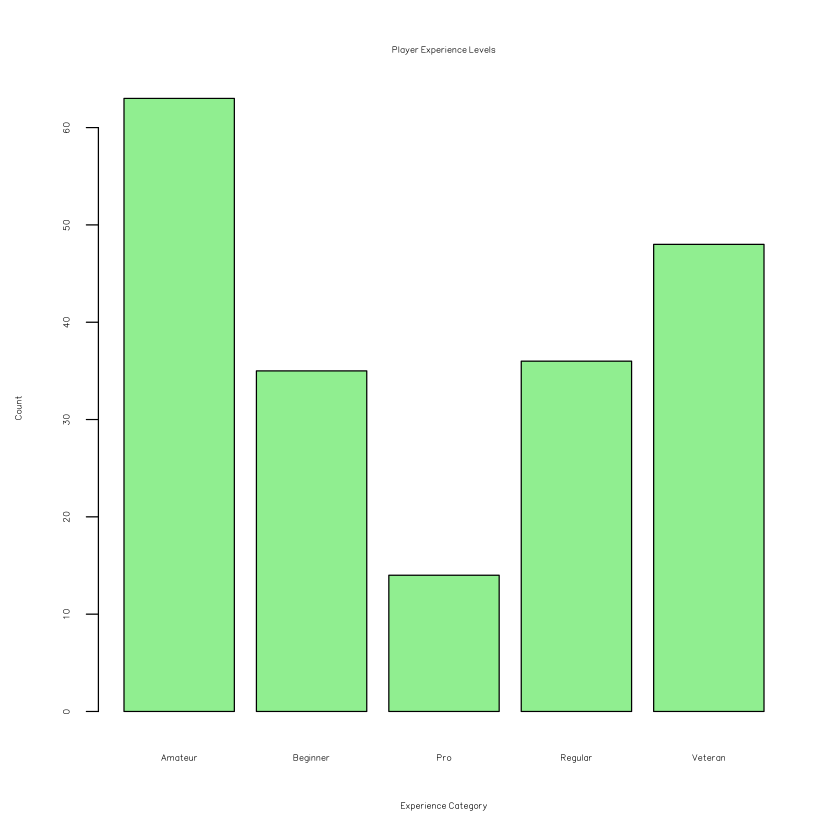

In [13]:
barplot(table(players$experience),
        main = "Player Experience Levels",
        xlab = "Experience Category",
        ylab = "Count",
        col = "lightgreen")

In [ ]:
## Methods and Plan

##For my project, I will use a classification model to predict my response variable (e.g., whether a player subscribes or whether a player is a high-engagement user).
##I plan to use the k-Nearest Neighbours (k-NN) method.

## Why this method is appropriate
## k-NN is simple to understand and works well when the goal is to predict categories.
## It does not assume any specific mathematical form or distribution in the data.

## Assumptions
## k-NN assumes that similar players (in terms of their features) tend to belong to the same class.
## Numeric variables need to be on the same scale, so I will standardize them.

## Limitations
## k-NN can perform poorly if there are many irrelevant features.
## It can be sensitive to the choice of k 
## It may struggle if the data has a lot of noise or if classes overlap heavily.

## How I will compare and select the model
## I will try multiple values of k and use cross-validation to see which one works best.
## I will compare models mainly using accuracy, but will also look at class balance if needed.
## The best k will be the one with the highest cross-validated performance.

## How I will process the data
## I will tidy and clean the data first (e.g., convert categorical variables to factors, scale numeric variables).
## I will split the dataset into 80% training and 20% testing.
## After choosing the best model I will evaluate it on the test set to estimate how well it predicts new players.


